***Necessary libraries added.***

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

##### **Pick an image from an URL.**

In [ ]:
!wget https://3.img-dpreview.com/files/p/E~forums/60131492/cd6b834b63d645ef8c7a7a65753c7d05 -O home.jpeg

--2022-10-17 15:30:38--  https://3.img-dpreview.com/files/p/E~forums/60131492/cd6b834b63d645ef8c7a7a65753c7d05
Resolving 3.img-dpreview.com (3.img-dpreview.com)... 52.85.132.124, 52.85.132.26, 52.85.132.127, ...
Connecting to 3.img-dpreview.com (3.img-dpreview.com)|52.85.132.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1570885 (1.5M) [image/jpeg]
Saving to: ‘home.jpeg’

home.jpeg           100%[===================>]   1.50M  --.-KB/s    in 0.01s   

2022-10-17 15:30:38 (111 MB/s) - ‘home.jpeg’ saved [1570885/1570885]



**Image read by the method 'imread()' as RGB**

In [ ]:
img = cv2.imread('home.jpeg')[:,:,::-1]

##### **Displaying the image.**

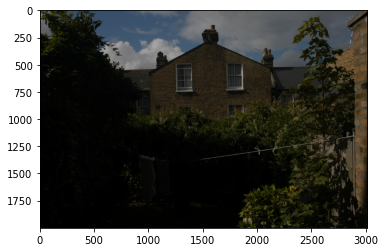

In [ ]:
plt.imshow(img)

In [ ]:
print(img)

[[[57 64 56]
  [53 58 52]
  [66 67 62]
  ...
  [87 77 65]
  [87 80 62]
  [85 78 60]]

 [[60 62 51]
  [56 56 48]
  [60 57 52]
  ...
  [85 75 63]
  [86 79 61]
  [86 79 61]]

 [[65 59 47]
  [68 61 51]
  [77 68 61]
  ...
  [82 73 58]
  [83 76 58]
  [84 77 59]]

 ...

 [[ 1  1  1]
  [ 1  1  1]
  [ 0  0  0]
  ...
  [ 6  8  5]
  [ 6  8  5]
  [ 6  8  5]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 5  7  4]
  [ 2  7  3]
  [ 3  8  4]]

 [[ 0  0  0]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 3  8  4]
  [ 2  6  5]
  [ 2  6  5]]]


##### **Convert the RGB image to GRAY SCALE and plot it.**

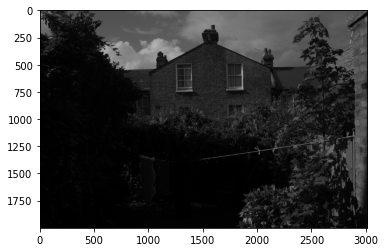

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')

##### **Applying the Power Law Transformation.**

**Define the power law transformation function.**


In [ ]:
def powerLawTransformation(c, gamma, normalized_pic):
  return c * (normalized_pic ** gamma)

**Define min and max values of image for scaling [0,1] range to normalized it.**

In [ ]:
img_min = np.min(img_gray, axis=(0,1), keepdims=True)
img_max = np.max(img_gray, axis=(0,1), keepdims=True)
normalized = (img_gray - img_min) / (img_max - img_min)

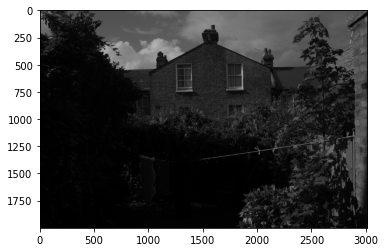

In [ ]:
plt.imshow(normalized, cmap='gray')

The image that I choose has dark pixels. That is why I considered using C value as 1 and Gamma value as 0.4. Using small values, like [0,1] range, made the image *brighter*.

Text(0.5, 1.0, 'Gamma: 1.8')

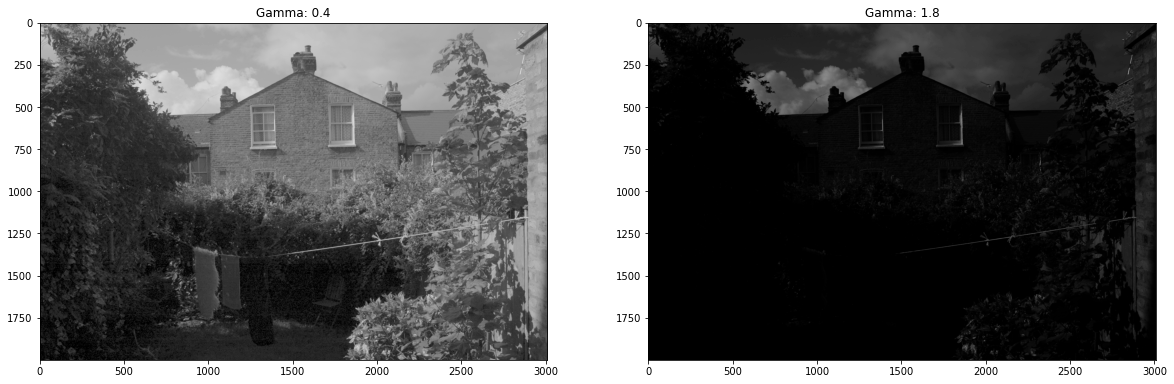

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(powerLawTransformation(1, 0.4, normalized), cmap='gray')
plt.title('Gamma: 0.4')
plt.subplot(122)
plt.imshow(powerLawTransformation(1, 1.8, normalized), cmap='gray')
plt.title('Gamma: 1.8')

In [ ]:
output = powerLawTransformation(1, 0.4, normalized)
print('normalized\n')
print(normalized)
print("\ngama func\n")
print(output)

normalized

[[0.25738397 0.23628692 0.27848101 ... 0.33333333 0.33755274 0.32911392]
 [0.25316456 0.23206751 0.24050633 ... 0.32489451 0.33333333 0.33333333]
 [0.24894515 0.26160338 0.29535865 ... 0.31223629 0.32067511 0.32489451]
 ...
 [0.00421941 0.00421941 0.         ... 0.02953586 0.02953586 0.02953586]
 [0.00421941 0.00421941 0.00421941 ... 0.02531646 0.02109705 0.02531646]
 [0.         0.00421941 0.00421941 ... 0.02531646 0.02109705 0.02109705]]

gama func

[[0.58107554 0.56153376 0.59967816 ... 0.64439401 0.64764446 0.64111879]
 [0.57724631 0.55750111 0.56552343 ... 0.63781826 0.64439401 0.64439401]
 [0.57337858 0.5848673  0.61395972 ... 0.62775958 0.63449192 0.63781826]
 ...
 [0.11222785 0.11222785 0.         ... 0.24442177 0.24442177 0.24442177]
 [0.11222785 0.11222785 0.11222785 ... 0.22980589 0.213643   0.22980589]
 [0.         0.11222785 0.11222785 ... 0.22980589 0.213643   0.213643  ]]


##### **Plot two images (before and after power law transformation) side by side.**

Text(0.5, 1.0, 'Power Law Transformation')

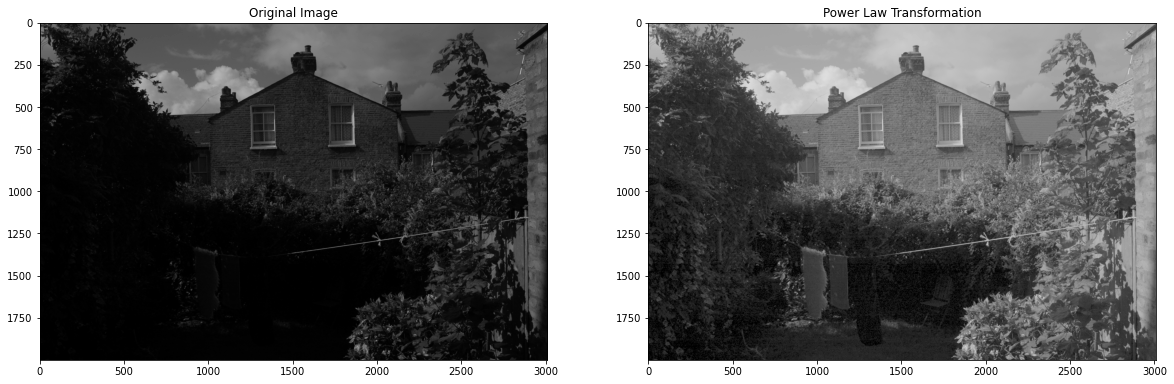

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(output, cmap='gray')
plt.title('Power Law Transformation')